In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Loading data
df = pd.read_csv("D:/Machine Learning Projects/Medical Insurance/archive/insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
# Here our dependent variable is Charges

df.shape
# we have 1338 rows and 7 columns 


(1338, 7)

In [10]:
#getting information abt the dataset
print(df.info())
# we can see we dont have any missing values or null values
# Sex , region and smoker column contains nominal data also categorical which we need to change in further steps
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [11]:
df.isnull().sum()
# checking missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Data analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


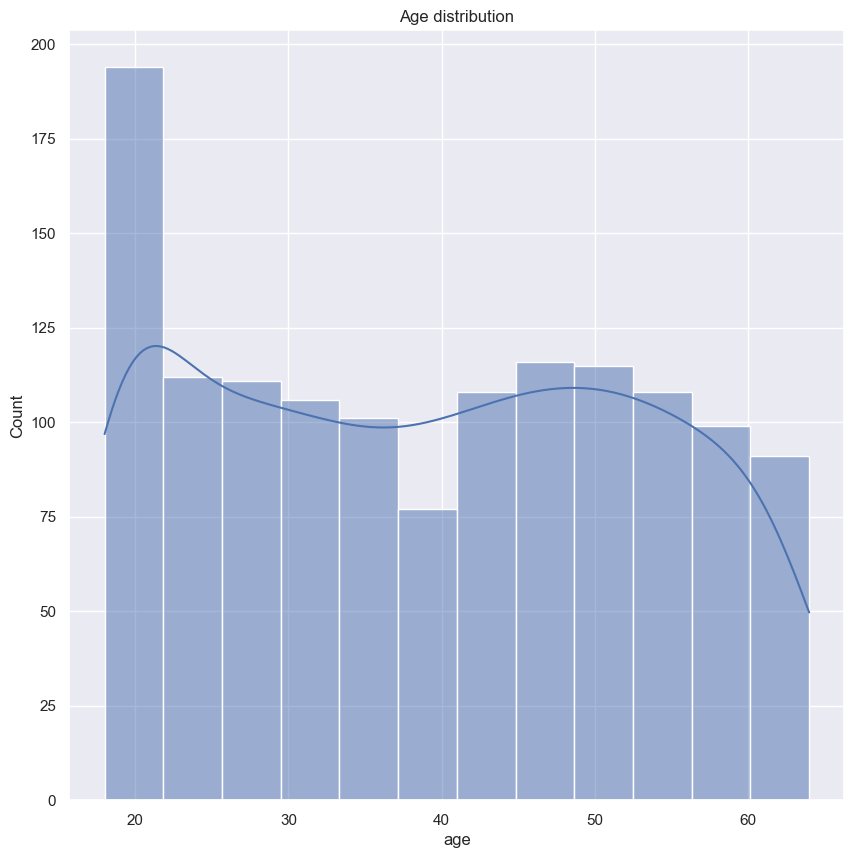

In [16]:
sns.set()
plt.figure(figsize = (10,10))
sns.histplot(df["age"],kde = True)
plt.title("Age distribution")
plt.show()

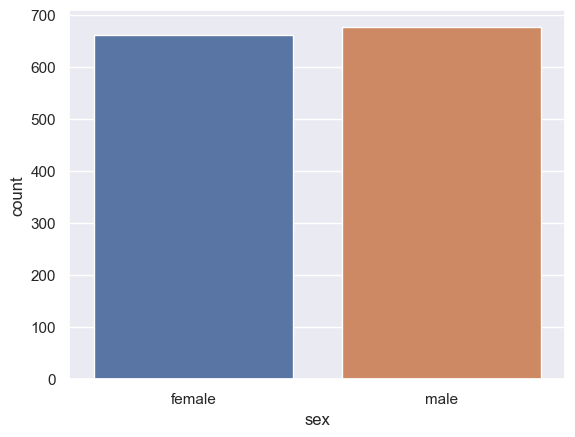

In [22]:
# We can visualize Categorical data using Pie chart, Bar chart, count plot, Donut chart, etc
sns.countplot(x="sex",data = df)
plt.show()

In [24]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

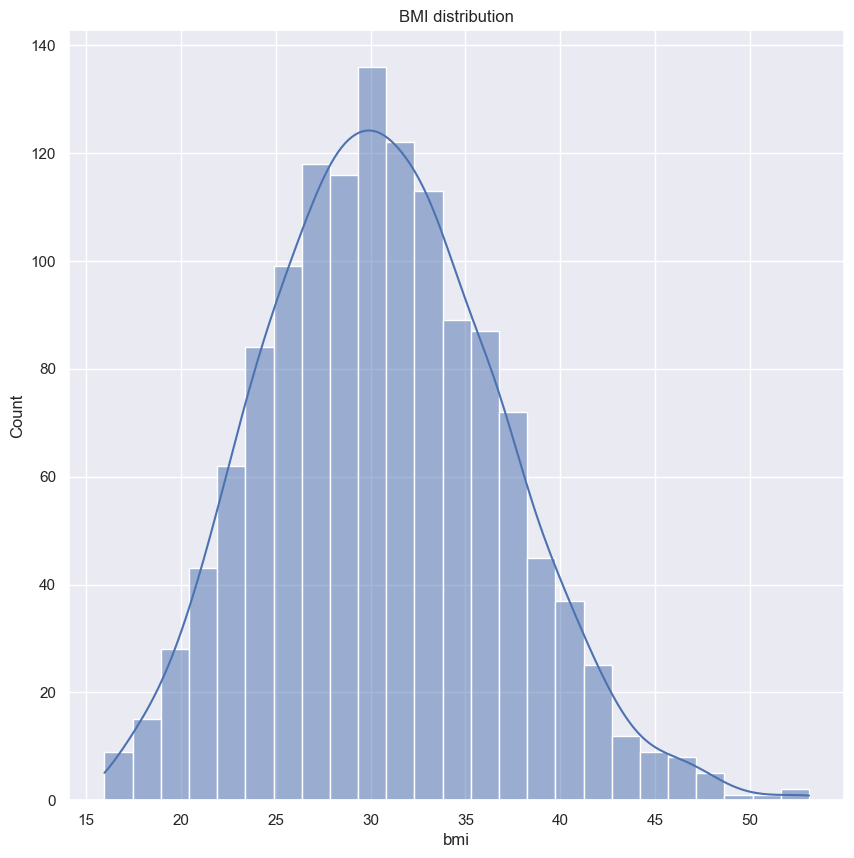

In [26]:
sns.set()
plt.figure(figsize = (10,10))
sns.histplot(df["bmi"],kde = True)
plt.title("BMI distribution")
plt.show()

Normal BMI range = 18.5 to 24.9


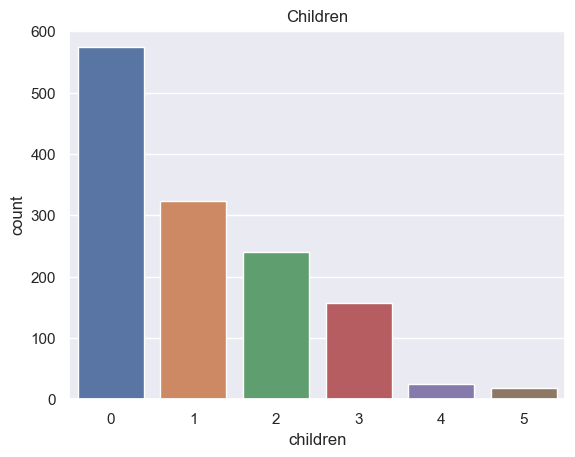

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [29]:
sns.countplot(x="children",data = df)
plt.title("Children")
plt.show()
df["children"].value_counts()

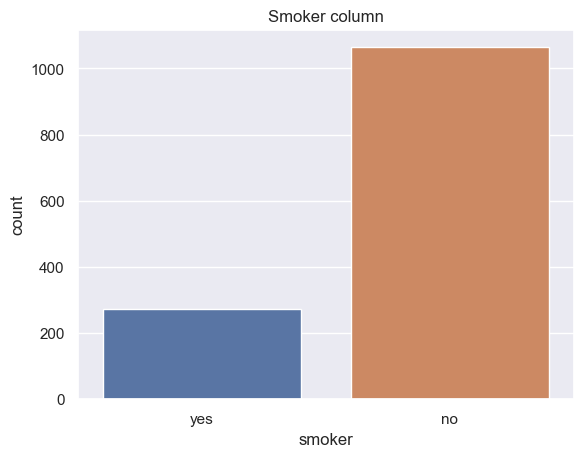

Count of smokers


no     1064
yes     274
Name: smoker, dtype: int64

In [30]:
sns.countplot(x="smoker",data = df)
plt.title("Smoker column")
plt.show()
print("Count of smokers")
df["smoker"].value_counts()

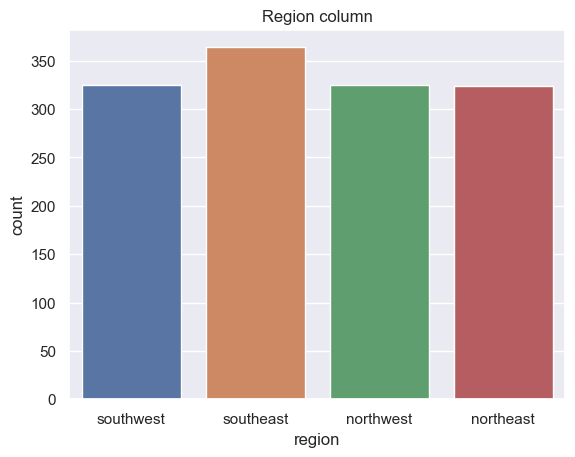

region count


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [32]:
sns.countplot(x="region",data = df)
plt.title("Region column")
plt.show()
print("region count")
df["region"].value_counts()

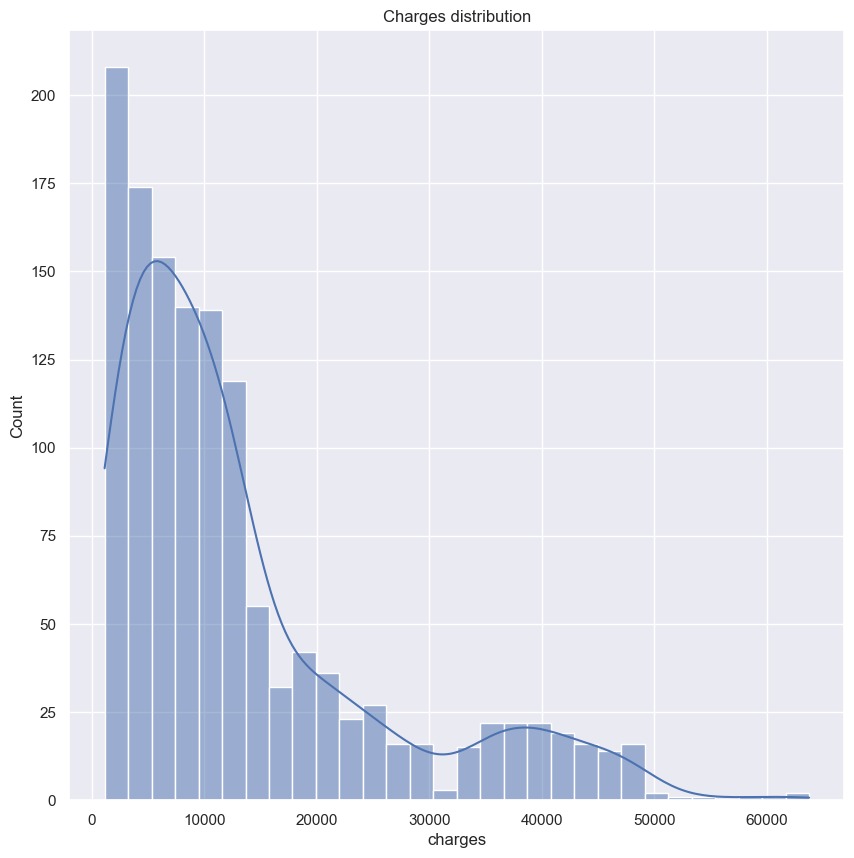

In [33]:
sns.set()
plt.figure(figsize = (10,10))
sns.histplot(df["charges"],kde = True)
plt.title("Charges distribution")
plt.show()


Charges columns is right skewed


In [36]:
# Data preprocessing
# Encoding the categorical features

df.replace({"sex":{"male":0,"female":1}},inplace = True)
df.replace({"smoker":{"yes": 0,"no": 1}},inplace = True)
df.replace({"region": {"southeast": 0 , "southwest": 1 , "northeast": 2 , "northwest": 3}},inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [37]:
#putting the target variable in Y 
x = df.drop(columns="charges", axis = 1)
y = df["charges"]

In [39]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [42]:
# Splitting the data
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, train_size= 0.8, random_state= 2)

In [43]:
print(x_train.size,x.size,x_test.size)

6420 8028 1608


In [44]:
# Creating model
reg = LinearRegression()


In [45]:
reg.fit(x_train,y_train)

LinearRegression()

In [46]:
train_pred = reg.predict(x_train)
test_pred = reg.predict(x_test)


In [47]:
# R^2 Value lies between 0 and 1 : Closer to 1 is said to be good
r_train = metrics.r2_score(y_train,train_pred)
r_test = metrics.r2_score(y_test,test_pred)
print("R2 Value for train: ",r_train)
print("R2 value for test: ", r_test)

R2 Value for train:  0.751505643411174
R2 value for test:  0.7447273869684077


We can say our model would work better and we can increase it more by eliminating the right skewdness and more


In [49]:
# We will now take some value from our CSV file to know whether out model is able to predict or not
input_data = (37, 0, 28.025,2 , 1 , 3)
# changing input_data from tuple to numppy array

input_nparr = np.asanyarray(input_data)

# reshaping the data
input_data_reshaped = input_nparr.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

[7795.1371554]


C:\Users\VIJAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
